In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_excel('../../dataset/raw/PPG-BP dataset.xlsx')

In [2]:
df = df.rename(columns={
    'Systolic Blood Pressure(mmHg)': 'Systolic BP(mmHg)',
    'Diastolic Blood Pressure(mmHg)': 'Diastolic BP(mmHg)'
})

df.head()

Num.  subject_ID Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0     1           2   Female         45         152          63   
1     2           3   Female         50         157          50   
2     3           6   Female         47         150          47   
3     4           8     Male         45         172          65   
4     5           9   Female         46         155          65   

   Systolic BP(mmHg)  Diastolic BP(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)  \
0                161                  89               97    27.268006   
1                160                  93               76    20.284799   
2                101                  71               79    20.888889   
3                136                  93               87    21.971336   
4                123                  73               73    27.055151   

           Hypertension Diabetes cerebral infarction cerebrovascular disease  
0  Stage 2 hypertension      NaN                 NaN                     NaN  
1  Stage 2 hypertension      NaN                 NaN                     NaN  
2                Normal      NaN                 NaN                     NaN  
3       Prehypertension      NaN                 NaN                     NaN  
4       Prehypertension      NaN                 NaN                     NaN

In [3]:
# Chuyển đổi cột 'Hypertension' thành
#0 nếu Normal, 1 nếu Stage 1, 2 nếu Stage 2, 3 nếu Pre
def convert_hypertension_status(status):
    if status == "Normal":
        return 0
    elif status == "Stage 1 hypertension":
        return 1
    elif status == "Stage 2 hypertension":
        return 2
    elif status == "Prehypertension":
        return 3
    else:
        return status
    
if df['Hypertension'].dtype == object:
    df['Hypertension'] = df['Hypertension'].apply(convert_hypertension_status)

#đổi dtype thành int
df['Hypertension'] = df['Hypertension'].astype('int')

In [4]:
#list numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != object and feature not in ['Num.'] + ['subject_ID'] + ['Hypertension']] #nếu không phải object sẽ là numerical

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  7


Age(year)  Height(cm)  Weight(kg)  Systolic BP(mmHg)  Diastolic BP(mmHg)  \
0         45         152          63                161                  89   
1         50         157          50                160                  93   
2         47         150          47                101                  71   
3         45         172          65                136                  93   
4         46         155          65                123                  73   

   Heart Rate(b/m)  BMI(kg/m^2)  
0               97    27.268006  
1               76    20.284799  
2               79    20.888889  
3               87    21.971336  
4               73    27.055151

# 1. Model Training

✓ Ứng với mỗi lần chạy, cần đưa ra confusion matrix trước cho mỗi thuật toán (confusion matrix trước classification report)

✓ chạy random forest, k-nn, naive bayes, gradient boosting(thử và study mechanism, đc thì chạy)
- study mechanism decision tree, khi thế các parameter khác nhau sẽ như thế nào?
- study Hyperparameter tuning(SVM, Random forest)

✓ vẽ multiple bar chart/line chart thống kê accuracy của từng thuật toán với features
- study and vẽ ROC Curve

✓ vẽ 3D BMI, Systolic, Diastolic, Heart Rate - dùng plotly
- Dùng PCA cho tập dataset với BMI, Systolic, Diastolic, Heart Rate, giảm thành 2 chiều.
- Dùng dataset sau khi PCA chạy lại cho model.

Number of numerical variables:  7


=============================== 2 Features ===============================

['Systolic BP(mmHg)', 'Diastolic BP(mmHg)']


Classification Report:
Accuracy Score: 0.9091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.83      0.50      0.62        10
           2       1.00      0.83      0.91         6
           3       0.84      1.00      0.91        26

    accuracy                           0.91        66
   macro avg       0.92      0.83      0.86        66
weighted avg       0.91      0.91      0.90        66



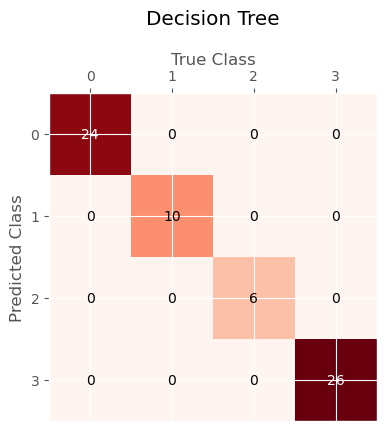

Classification Report:
Accuracy Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        26

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



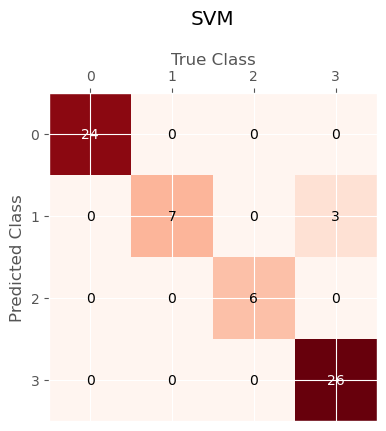

Classification Report:
Accuracy Score: 0.9545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00         6
           3       0.90      1.00      0.95        26

    accuracy                           0.95        66
   macro avg       0.97      0.93      0.94        66
weighted avg       0.96      0.95      0.95        66



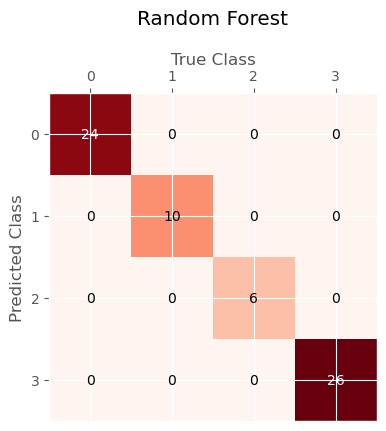

Classification Report:
Accuracy Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        26

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



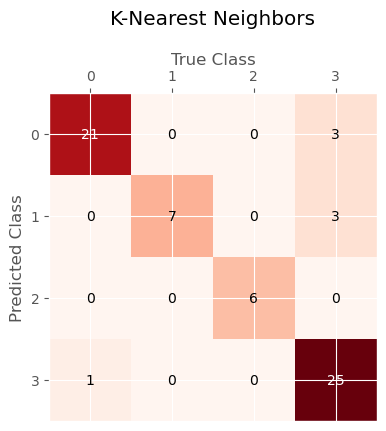

Classification Report:
Accuracy Score: 0.8939
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00         6
           3       0.81      0.96      0.88        26

    accuracy                           0.89        66
   macro avg       0.94      0.88      0.90        66
weighted avg       0.91      0.89      0.89        66



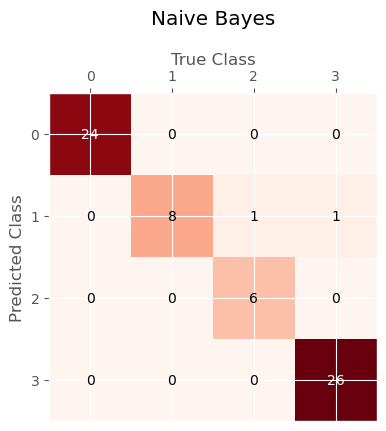

Classification Report:
Accuracy Score: 0.9697
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92         6
           3       0.96      1.00      0.98        26

    accuracy                           0.97        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.97      0.97      0.97        66



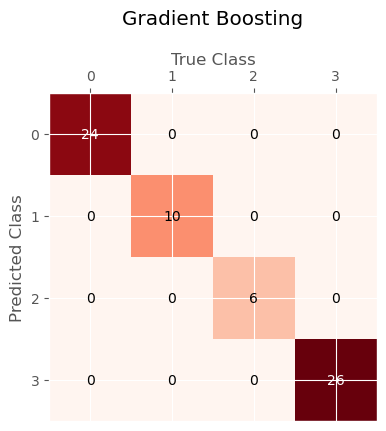

Classification Report:
Accuracy Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        26

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_excel('../../dataset/raw/PPG-BP dataset.xlsx')

df = df.rename(columns={
    'Systolic Blood Pressure(mmHg)': 'Systolic BP(mmHg)',
    'Diastolic Blood Pressure(mmHg)': 'Diastolic BP(mmHg)'
})

df.head()

# Chuyển đổi cột 'Hypertension' thành
#0 nếu Normal, 1 nếu Stage 1, 2 nếu Stage 2, 3 nếu Pre
def convert_hypertension_status(status):
    if status == "Normal":
        return 0
    elif status == "Stage 1 hypertension":
        return 1
    elif status == "Stage 2 hypertension":
        return 2
    elif status == "Prehypertension":
        return 3
    else:
        return status
    
if df['Hypertension'].dtype == object:
    df['Hypertension'] = df['Hypertension'].apply(convert_hypertension_status)

#đổi dtype thành int
df['Hypertension'] = df['Hypertension'].astype('int')

#list numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != object and feature not in ['Num.'] + ['subject_ID'] + ['Hypertension']] #nếu không phải object sẽ là numerical

print('Number of numerical variables: ', len(numerical_features))

# df[numerical_features].head()

# Hàm vẽ confusion matrix theo mẫu và yêu cầu
def plot_confusion_matrix(cm, class_labels, model_name):
    fig, ax = plt.subplots()
    ax.imshow(cm, cmap=plt.cm.Reds)

    # Đánh số trên từng ô
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] < cm.max()/2 else "white")

    # Đặt nhãn cho các trục
    ax.set_ylabel('Predicted Class')
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_yticklabels(class_labels)

    # Di chuyển trục x lên phía trên
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel('True Class')
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels)

    # Di chuyển tiêu đề xuống phía dưới
    plt.title(model_name, loc='center', pad=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Điều chỉnh để tránh chồng lấp

    # Hiển thị biểu đồ
    plt.show()

# Danh sách các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42), #C=1.0, gamma='scale' = 1 / (n_features * X.var())
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Labels 'Hypertension'
class_labels = [0, 1, 2, 3]

# Các bộ features sẽ dùng để train và kiểm tra
feature_sets = [
    ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)']
    # ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'BMI(kg/m^2)']
    # ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'BMI(kg/m^2)', 'Heart Rate(b/m)']
    # ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'BMI(kg/m^2)', 'Heart Rate(b/m)', 'Age(year)']
    # ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'BMI(kg/m^2)', 'Heart Rate(b/m)', 'Age(year)', 'Height(cm)']
    # ['Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'BMI(kg/m^2)', 'Heart Rate(b/m)', 'Age(year)', 'Height(cm)', 'Weight(kg)']
]

# Target từ cột 'Hypertension'
target = df['Hypertension']

# Tạo dictionary để lưu accuracy của từng model với từng feature set
accuracy_dict = {model_name: [] for model_name in models.keys()}

# Lặp qua từng feature set
for features in feature_sets:
    print(f"\n\n=============================== {len(features)} Features ===============================")
    print(f"\n{features}")

    X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.3, random_state=42, stratify=target)

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        
        #Dự đoán kết quả
        if model_name in ["Logistic Regression", "SVM", "K-Nearest Neighbors", "Naive Bayes"]:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
        #Tính accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_dict[model_name].append(accuracy)

        #Tính confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        #Show confusion matrix
        plot_confusion_matrix(cm, class_labels, model_name)

        # Hiển thị classification report và accuracy score
        print("Classification Report:")
        report = classification_report(y_test, y_pred, labels=[0, 1, 2, 3])
        print(f"Accuracy Score: {accuracy:.4f}")
        print(report)

- True Positives (TP) cho một lớp là số lượng mẫu của lớp đó được dự đoán đúng.
- False Positives (FP) cho một lớp là số lượng mẫu được dự đoán là lớp đó nhưng thực tế thuộc lớp khác.
- False Negatives (FN) cho một lớp là số lượng mẫu thuộc lớp đó nhưng bị dự đoán sai thành lớp khác.

Ví dụ Logistic Regression cho lớp 1 (hàng thứ 2 và cột thứ 2 trong ma trận):
1. True Positives (TP) = 5:
- Có 5 mẫu thực sự thuộc lớp 1 và được dự đoán đúng là lớp 1.
- Điều này tương ứng với ô (1, 1) trong ma trận (hàng 2, cột 2), nơi giá trị là 5.
2. False Positives (FP) = 1:
- Có 1 mẫu không thuộc lớp 1 (thực tế thuộc lớp 2) nhưng bị dự đoán sai thành lớp 1.
- Điều này tương ứng với ô (2, 1) trong ma trận (hàng 3, cột 2), nơi giá trị là 1. Ở đây, hàng là lớp dự đoán (Predicted Class 2), và cột là lớp thực tế (True Class 1).
3. False Negatives (FN) = 5:
- Có 5 mẫu thực sự thuộc lớp 1 nhưng bị dự đoán sai thành lớp khác (ở đây, bị dự đoán sai thành lớp 3).
- Điều này tương ứng với ô (1, 3) trong ma trận (hàng 2, cột 4), nơi giá trị là 5. Ở đây, hàng là lớp dự đoán (Predicted Class 3), và cột là lớp thực tế (True Class 1).
Kết Luận:
FP = 1 đúng là giá trị ở ô (2, 1), tức là mẫu thuộc lớp 2 (Predicted Class) nhưng thực tế là lớp 1 (True Class).

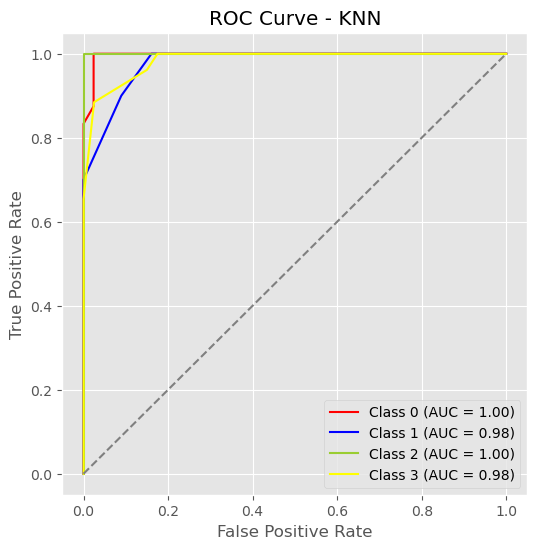

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Chuyển y_test thành dạng one-vs-rest (binarize) nếu có nhiều hơn 2 lớp
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Thay [0, 1, 2, 3] bằng các nhãn thực tế của bạn
n_classes = y_test_binarized.shape[1]

# Kiểm tra nếu KNN có hỗ trợ predict_proba()
if hasattr(models["K-Nearest Neighbors"], "predict_proba"):
    y_score = models["K-Nearest Neighbors"].predict_proba(X_test_scaled)  # Sử dụng X_test_scaled nếu cần chuẩn hóa
else:
    print("❌ KNN không hỗ trợ predict_proba()")
    y_score = None

# Nếu y_score hợp lệ, tiến hành vẽ ROC Curve
if y_score is not None:
    plt.figure(figsize=(6, 6))

    # Danh sách màu cho từng class (Tránh màu đen)
    colors = ["red", "blue", "yellowgreen", "yellow"]  # Class 3 có màu "purple" thay vì mặc định (có thể bị đen)

    # Vẽ ROC Curve cho từng class (One-vs-Rest)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})", color=colors[i])

    # Vẽ đường chéo đại diện cho classifier random (baseline)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    # Trang trí biểu đồ
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc="lower right")
    plt.grid(True)

    # Hiển thị biểu đồ
    plt.show()


## 1.1 Accuracy Multiple Barchart

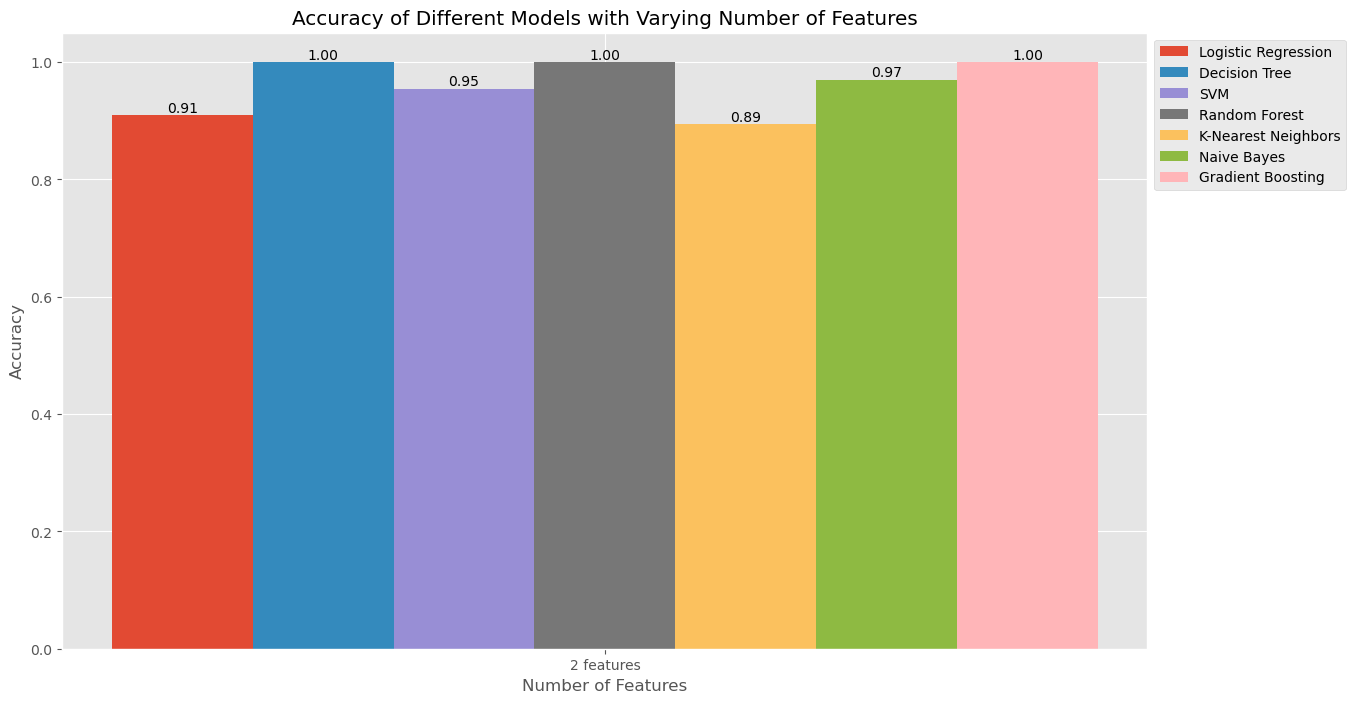

In [13]:
# bar chart hiển thị accuracy của các models với lượng features khác nhau
plt.figure(figsize=(14, 8))
bar_width = 0.05 
index = np.arange(len(feature_sets))  # Chỉ số của các bộ features

for i, (model_name, accuracies) in enumerate(accuracy_dict.items()):
    bars = plt.bar(index + i * bar_width, accuracies, bar_width, label=model_name)
    for bar in bars:
        value = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            value, 
            f'{value:.2f}',
            ha='center', 
            va='bottom')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models with Varying Number of Features')
plt.xticks(index + bar_width * (len(models) - 1) / 2, [f"{len(f)} features" for f in feature_sets])

# Chú thích
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

- Decision Tree và SVM có accuracy 100% cao nhất
- Logistic Regression, SVM, k-nn, Naive Bayes accuracy không được 100% cho dù tăng hay giảm features trong thuật toán.
=> 

## 1.2 Run time & performance

In [14]:
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import numpy as np

# Tạo dictionaries để lưu trữ thời gian và sử dụng bộ nhớ của từng model
time_dict = {}
memory_dict = {}

print("Performance & run time report is running...")

# Lặp qua từng feature set
for features in feature_sets:
    for model_name, model in models.items():
        # Bắt đầu đo thời gian và sử dụng bộ nhớ
        start_time = time.time()
        mem_usage = memory_usage((model.fit, (X_train_scaled, y_train)), max_iterations=1)
        end_time = time.time()

        # Tính tổng thời gian và bộ nhớ sử dụng
        elapsed_time = end_time - start_time
        max_memory = max(mem_usage)

        # Lưu trữ kết quả
        if model_name not in time_dict:
            time_dict[model_name] = []
            memory_dict[model_name] = []
        
        time_dict[model_name].append(elapsed_time)
        memory_dict[model_name].append(max_memory)
        
# Hàm để vẽ biểu đồ thời gian và bộ nhớ sử dụng
def plot_time_memory(time_dict, memory_dict, feature_sets):
    models = list(time_dict.keys())
    num_features = [f"{len(f)} features" for f in feature_sets]
    num_bars = len(models)
    
    # Điều chỉnh bar_width riêng cho từng biểu đồ
    bar_width_time = 0.15
    bar_width_memory = 0.15
    index = np.arange(len(feature_sets))

    # Plot time
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(models):
        plt.bar(index + i * bar_width_time, time_dict[model_name], bar_width_time, label=model_name)
        for j, value in enumerate(time_dict[model_name]):
            plt.text(index[j] + i * bar_width_time, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    plt.xlabel('Number of Features')
    plt.ylabel('Time (seconds)')
    plt.title('Time Taken by Different Models with Varying Number of Features')
    plt.xticks(index + bar_width_time * (num_bars - 1) / 2, num_features)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Plot memory
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(models):
        plt.bar(index + i * bar_width_memory, memory_dict[model_name], bar_width_memory, label=model_name)
        for j, value in enumerate(memory_dict[model_name]):
            plt.text(index[j] + i * bar_width_memory, value, f'{int(value)}', ha='center', va='bottom', fontsize=10)
    plt.xlabel('Number of Features')
    plt.ylabel('Memory Usage (MiB)')
    plt.title('Memory Usage by Different Models with Varying Number of Features')
    plt.xticks(index + bar_width_memory * (num_bars - 1) / 2, num_features)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

Performance & run time report is running...


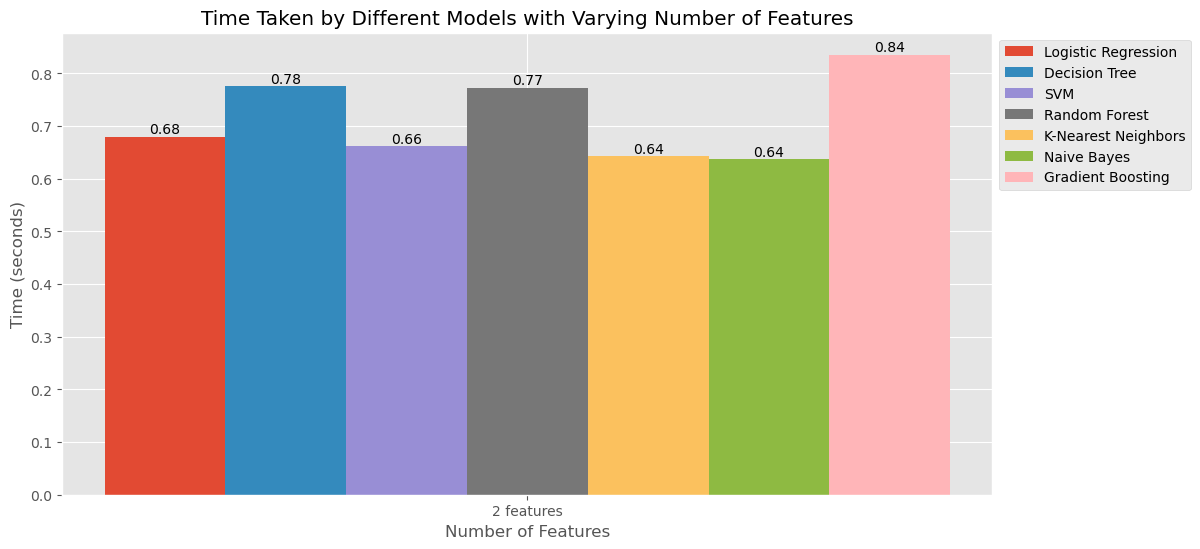


Time taken by each model with different feature sets:

Logistic Regression:
2 features: 0.6799 seconds

Decision Tree:
2 features: 0.7752 seconds

SVM:
2 features: 0.6622 seconds

Random Forest:
2 features: 0.7730 seconds

K-Nearest Neighbors:
2 features: 0.6424 seconds

Naive Bayes:
2 features: 0.6376 seconds

Gradient Boosting:
2 features: 0.8355 seconds

Memory usage by each model with different feature sets:

Logistic Regression:
2 features: 253.11 MiB

Decision Tree:
2 features: 253.12 MiB

SVM:
2 features: 253.14 MiB

Random Forest:
2 features: 253.17 MiB

K-Nearest Neighbors:
2 features: 253.17 MiB

Naive Bayes:
2 features: 253.17 MiB

Gradient Boosting:
2 features: 253.17 MiB


In [15]:
plot_time_memory(time_dict, memory_dict, feature_sets)

# Report
print("\nTime taken by each model with different feature sets:")
for model_name, times in time_dict.items():
    print(f"\n{model_name}:")
    for i, time_taken in enumerate(times):
        print(f"{len(feature_sets[i])} features: {time_taken:.4f} seconds")

print("\nMemory usage by each model with different feature sets:")
for model_name, memories in memory_dict.items():
    print(f"\n{model_name}:")
    for i, memory_used in enumerate(memories):
        print(f"{len(feature_sets[i])} features: {memory_used:.2f} MiB")

Vẽ thêm scatter plot để show memories và time performance. Trục x là times, y là memories.

In [16]:
# Total time & memory
total_time_dict = {model_name: sum(times) for model_name, times in time_dict.items()}
total_memory_dict = {model_name: sum(memories) for model_name, memories in memory_dict.items()}

# Hiển thị kết quả
for model_name in models.keys():
    print(f"====={model_name}=====")
    print(f"Toal Time: {total_time_dict[model_name]:.2f} seconds")
    print(f"Total Memory: {total_memory_dict[model_name]:.2f} MiB")

=====Logistic Regression=====
Toal Time: 0.68 seconds
Total Memory: 253.11 MiB
=====Decision Tree=====
Toal Time: 0.78 seconds
Total Memory: 253.12 MiB
=====SVM=====
Toal Time: 0.66 seconds
Total Memory: 253.14 MiB
=====Random Forest=====
Toal Time: 0.77 seconds
Total Memory: 253.17 MiB
=====K-Nearest Neighbors=====
Toal Time: 0.64 seconds
Total Memory: 253.17 MiB
=====Naive Bayes=====
Toal Time: 0.64 seconds
Total Memory: 253.17 MiB
=====Gradient Boosting=====
Toal Time: 0.84 seconds
Total Memory: 253.17 MiB


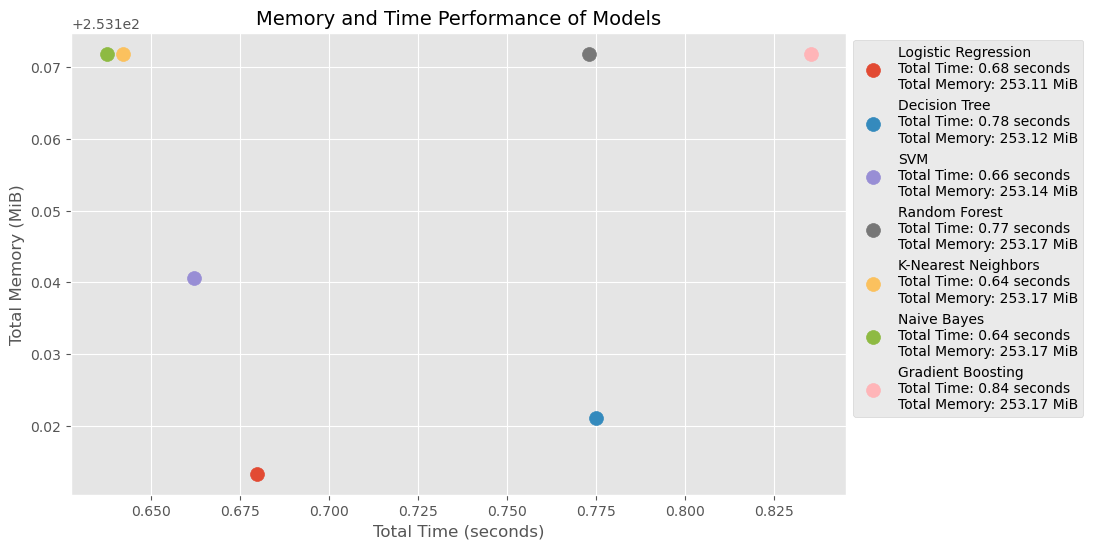

In [19]:
total_time_dict = {model_name: sum(times) for model_name, times in time_dict.items()}
total_memory_dict = {model_name: sum(memories) for model_name, memories in memory_dict.items()}

# Create scatter plot
plt.figure(figsize=(10, 6))
for model_name in time_dict.keys():
    plt.scatter(
        total_time_dict[model_name], total_memory_dict[model_name],
        label=f"{model_name}\nTotal Time: {total_time_dict[model_name]:.2f} seconds\n"
              f"Total Memory: {total_memory_dict[model_name]:.2f} MiB",
        s=100
    )

# Configure plot
plt.title("Memory and Time Performance of Models", fontsize=14)
plt.xlabel("Total Time (seconds)", fontsize=12)
plt.ylabel("Total Memory (MiB)", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# Display plot
plt.show()

## 1.3 Conclusion Model

- Decision Tree và Random Forest accuracy 100% dù tăng số lượng features, 
- Logistic Regression có accuracy ổn, vẫn bị mismatch 10-20%. Nhưng thời gian chạy nhanh và sử dụng ít bộ nhớ nhất, phù hợp cho bài toán.

- SVM có độ chính xác cao nhưng thời gian chạy chậm hơn đáng kể khi tăng số lượng features.
- K-NN và Naive Bayes có độ chính xác thấp hơn và không tối ưu khi số lượng features lớn.

# 2. Model Training with Hyperparameter tuning

## 2.1 SVM

 Time và memory của SVM trước khi tune với features Systolic và Diastolic
- time_dict["SVM"][0]
- memory_dict["SVM"][0]
- accuracy_dict["SVM"][0]

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy after tuning: 0.9697

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         6
           3       0.93      1.00      0.96        26

    accuracy                           0.97        66
   macro avg       0.98      0.95      0.96        66
weighted avg       0.97      0.97      0.97        66



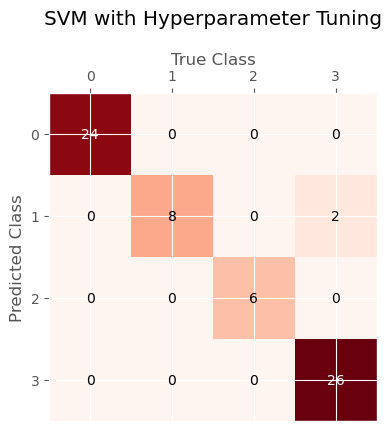

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],          
    'gamma': [0.01, 0.02, 0.03],  
    'kernel': ['rbf', 'linear'] #Chọn linear vì, scatter plot predict và true label cho thấy các 
                                #điểm gần như nằm trên 1 mặt phẳng, cho nên chọn linear để cắt theo mặt phẳng
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(df[['Systolic BP(mmHg)', 'Diastolic BP(mmHg)']],
                                                    target, test_size=0.3, random_state=42, stratify=target)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit mô hình với GridSearch
grid.fit(X_train_scaled, y_train)

# In ra các tham số tốt nhất
print("Best hyperparameters found: ", grid.best_params_)

# Dự đoán trên tập test với mô hình đã được tối ưu
y_pred = grid.best_estimator_.predict(X_test_scaled)

# In ra kết quả accuracy và classification report
accuracy_tuned = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning: {accuracy_tuned:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3]))

# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1, 2, 3], "SVM with Hyperparameter Tuning")

In [34]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Before Tuning', 'After Tuning']
accuracy_comparison = [accuracy_dict['SVM'][0], accuracy_tuned]

#Accuracy
plt.figure(figsize=(3.5, 5))
plt.bar(labels, accuracy_comparison, color=['salmon', 'skyblue'])
for i, v in enumerate(accuracy_comparison):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Before and After Hyperparameter Tuning')
plt.show()

In [35]:
# Predict trước tune
y_pred_default = models["SVM"].predict(X_test_scaled)  # Dự đoán từ SVM trước khi tune

# Predict sau tune
y_pred_tuned = grid.best_estimator_.predict(X_test_scaled)  # Dự đoán từ SVM sau khi tune

#DataFrame để lưu trữ thông tin Systolic, Diastolic, true label, predicted label trước và sau khi tuning
df_plot = X_test.copy()
df_plot['True Label'] = y_test.values
df_plot['Predicted Label (Before Tuning)'] = y_pred_default
df_plot['Predicted Label (After Tuning)'] = y_pred_tuned

def highlight_misclassified(df, feature1, feature2, true_label, predicted_label):
    misclassified = df[df[true_label] != df[predicted_label]]
    plt.scatter(misclassified[feature1], misclassified[feature2], edgecolor='red', facecolor='none', linewidth=1.5, s=150, label='Misclassified')

# Vẽ scatter plot với true label
plt.figure(figsize=(18, 6))

# Subplot 1: True Label
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_plot, x='Systolic BP(mmHg)', y='Diastolic BP(mmHg)', hue='True Label', palette='Set2')
plt.title('True Label')
highlight_misclassified(df_plot, 'Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'True Label', 'True Label')  # Không khoanh đỏ vì là true label

# Subplot 2: Predicted Label Before Tuning
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_plot, x='Systolic BP(mmHg)', y='Diastolic BP(mmHg)', hue='Predicted Label (Before Tuning)', palette='Set2')
plt.title('Predicted Label (Before Tuning)')
highlight_misclassified(df_plot, 'Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'True Label', 'Predicted Label (Before Tuning)')

# Subplot 3: Predicted Label After Tuning
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_plot, x='Systolic BP(mmHg)', y='Diastolic BP(mmHg)', hue='Predicted Label (After Tuning)', palette='Set2')
plt.title('Predicted Label (After Tuning)')
highlight_misclassified(df_plot, 'Systolic BP(mmHg)', 'Diastolic BP(mmHg)', 'True Label', 'Predicted Label (After Tuning)')

plt.tight_layout()
plt.show()

# 3. Clustering



=============================== Logistic Regression ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)





=============================== Decision Tree ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)





=============================== SVM ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)



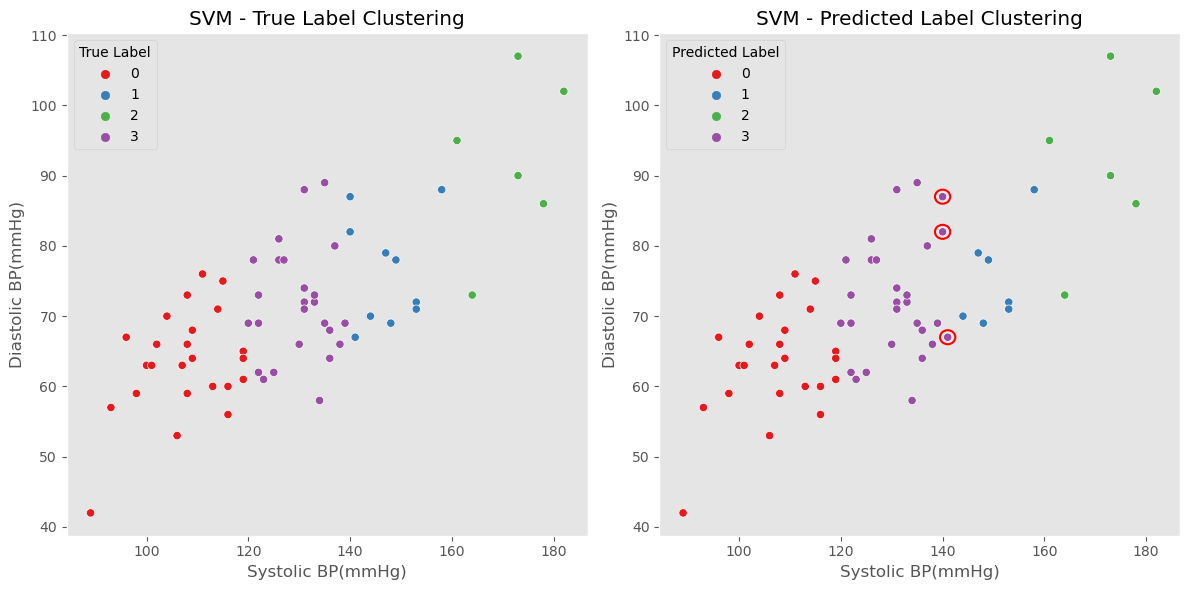



=============================== Random Forest ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)



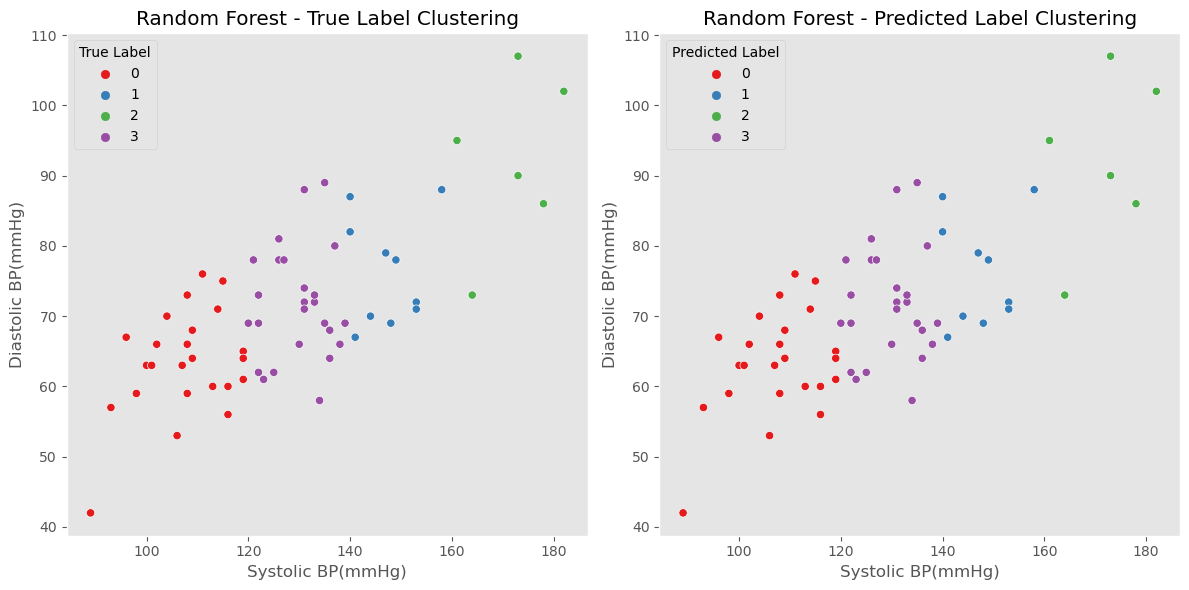



=============================== K-Nearest Neighbors ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)



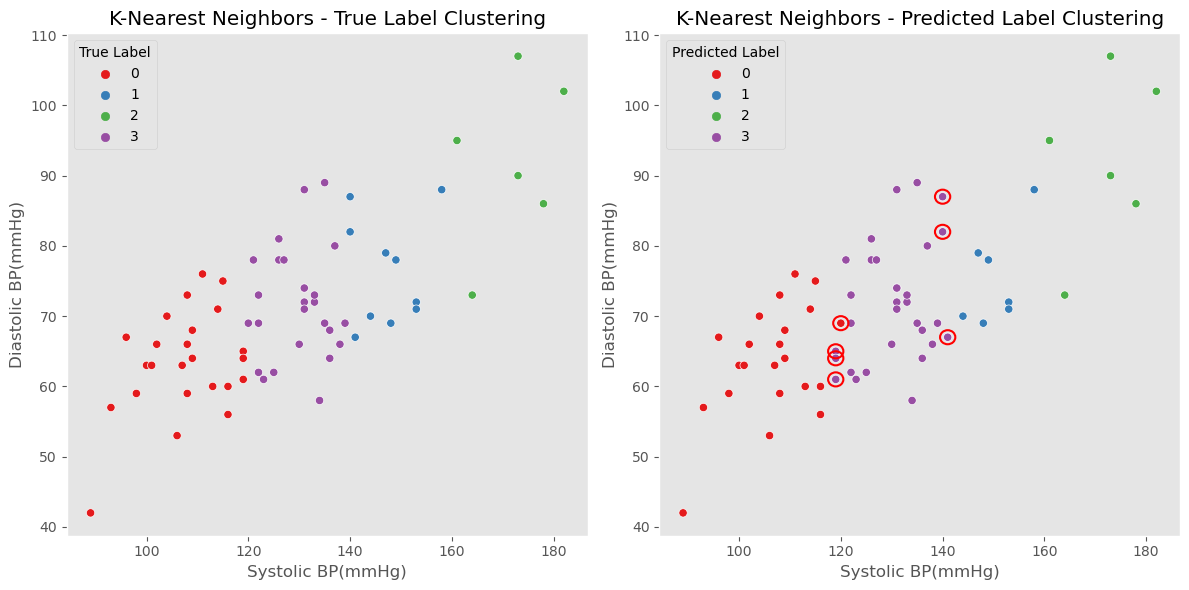



=============================== Naive Bayes ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)



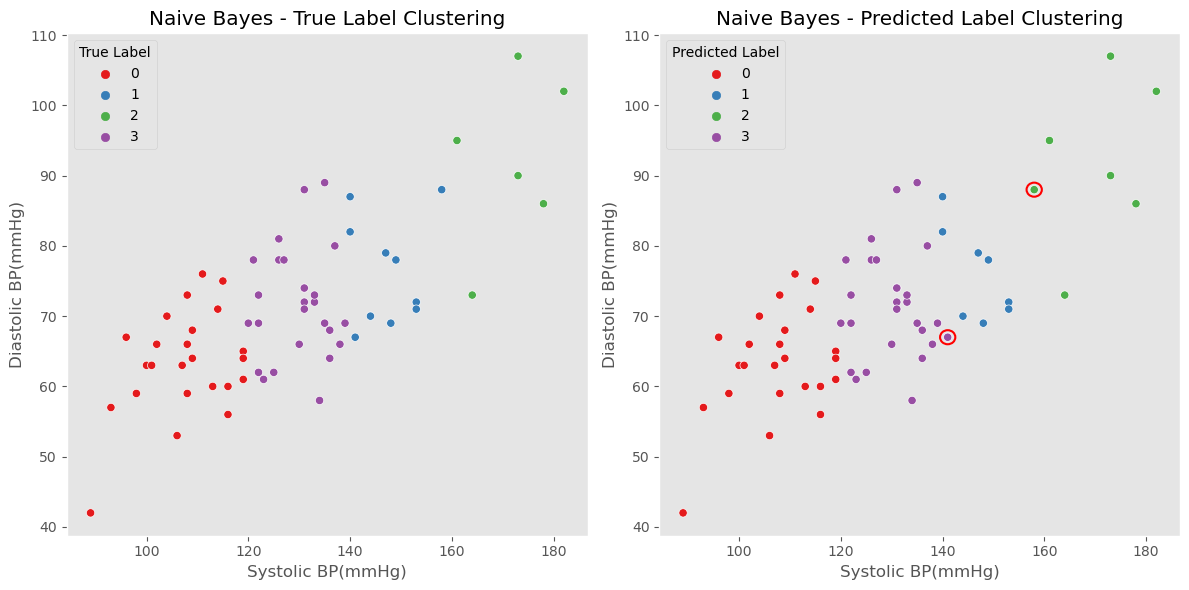



=============================== Gradient Boosting ===============================

Visualizing with features: Systolic BP(mmHg), Diastolic BP(mmHg)



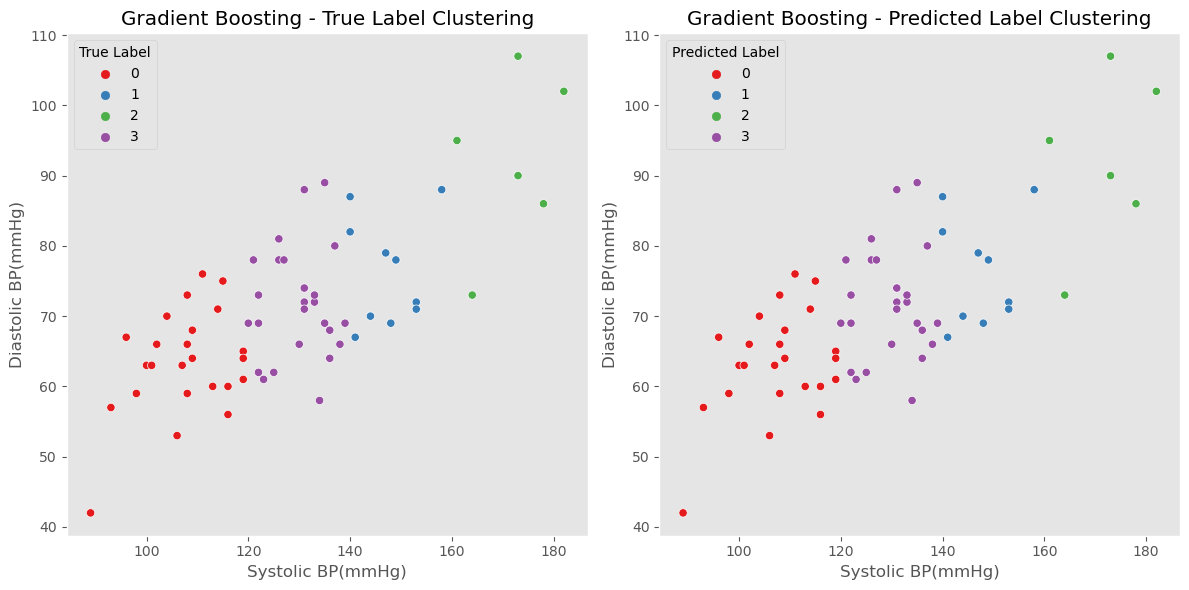

In [36]:
import matplotlib.patches as patches

df_copy=df.copy()

feature_pairs = [
    ('Systolic BP(mmHg)', 'Diastolic BP(mmHg)')
#     ('Diastolic BP(mmHg)', 'BMI(kg/m^2)'),
#     ('Diastolic BP(mmHg)', 'Heart Rate(b/m)')
]

for model_name, model in models.items():
    
    print(f"\n\n=============================== {model_name} ===============================")

    for feature1, feature2 in feature_pairs:
        features = [feature1, feature2]

        print(f"\nVisualizing with features: {feature1}, {feature2}\n")

        X_train, X_test, y_train, y_test = train_test_split(df_copy[features], target, test_size=0.3, random_state=42, stratify=target)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Huấn luyện lại mô hình với cặp feature mới
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Tạo DataFrame mới với dữ liệu kiểm tra, nhãn thực tế và nhãn dự đoán
        df_test_copy = X_test.copy()  # Sử dụng các feature từ data gốc
        df_test_copy['True Label'] = y_test.values
        df_test_copy['Predicted Label'] = y_pred

        # Vẽ phân cụm theo True Label
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.grid(False)
        sns.scatterplot(data=df_test_copy, x=feature1, y=feature2, hue='True Label', palette='Set1')
        plt.title(f'{model_name} - True Label Clustering')

        # Vẽ phân cụm theo Predicted Label
        plt.subplot(1, 2, 2)
        plt.grid(False)
        sns.scatterplot(data=df_test_copy, x=feature1, y=feature2, hue='Predicted Label', palette='Set1')
        plt.title(f'{model_name} - Predicted Label Clustering')

        # Highlight các điểm bị misclassified
        misclassified = df_test_copy[df_test_copy['True Label'] != df_test_copy['Predicted Label']]
        
        for i in range(misclassified.shape[0]):
            plt.gca().add_patch(patches.Ellipse(
                (misclassified[feature1].iloc[i], misclassified[feature2].iloc[i]),
                width=3, height=2, edgecolor='red', facecolor='none', lw=1.5))

        plt.tight_layout()
        plt.show()

bỏ gridline sọc sọc đằng sau chart, màu tím thành màu đen

# 4. PCA

1. Explain số chiều ban đầu là bao nhiêu
2. Không fixed số component, làm với range lớn
3. lấy variance ratio tốt hơn (variance ratio là 1 số array, hay ma trận)
4. run lại với model phía trên để xem performance

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn hóa dữ liệu
X = df[numerical_features].dropna()  # Loại bỏ hàng có giá trị NaN nếu có
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thực hiện PCA
pca = PCA()
pca.fit(X_scaled)

# Lấy explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Hiển thị tỷ lệ cho từng thành phần chính
print("Explained Variance Ratio cho từng Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Tính tổng tỷ lệ biến thiên tích lũy
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Chọn số lượng thành phần chính để đạt 90% biến thiên
n_components = np.argmax(cum_explained_variance >= 0.90) + 1

print("\nCumulitative Explained Variance Ratio cho từng Principal Component:")
for i, cum_ratio in enumerate(cum_explained_variance):
    print(f"Principal Components 1 to {i+1}: {cum_ratio:.2f}")

print(f"\nCần chọn {n_components} thành phần chính, "
      f"để giữ lại ít nhất 90% thông tin của dữ liệu ban đầu\n"
      f"Có nghĩa ta giữ lại {cum_explained_variance[n_components-1]:.2%} "
      f"tỷ lệ biến thiên, đảm bảo rằng phần lớn thông tin dữ liệu gốc vẫn được giữ nguyên.\n"
      f"Các thành phần sau có thể bị loại bỏ vì chỉ giải thích một lượng rất nhỏ biến thiên.")

Explained Variance Ratio cho từng Principal Component:
Principal Component 1: 0.3350
Principal Component 2: 0.2382
Principal Component 3: 0.1760
Principal Component 4: 0.1331
Principal Component 5: 0.0932
Principal Component 6: 0.0239
Principal Component 7: 0.0005

Cumulitative Explained Variance Ratio cho từng Principal Component:
Principal Components 1 to 1: 0.34
Principal Components 1 to 2: 0.57
Principal Components 1 to 3: 0.75
Principal Components 1 to 4: 0.88
Principal Components 1 to 5: 0.98
Principal Components 1 to 6: 1.00
Principal Components 1 to 7: 1.00

Cần chọn 5 thành phần chính, để giữ lại ít nhất 90% thông tin của dữ liệu ban đầu
Có nghĩa ta giữ lại 97.55% tỷ lệ biến thiên, đảm bảo rằng phần lớn thông tin dữ liệu gốc vẫn được giữ nguyên.
Các thành phần sau có thể bị loại bỏ vì chỉ giải thích một lượng rất nhỏ biến thiên.


In [46]:
# Thực hiện PCA với số lượng thành phần chính đã chọn
pca = PCA(n_components=5)

# Áp dụng PCA để chuyển đổi dữ liệu
X_pca = pca.fit_transform(X_scaled)

# Hiển thị kích thước mới của dữ liệu sau khi giảm chiều
print(f"Dataset shape after cut down the dimension: {X_pca.shape}")

Dataset shape after cut down the dimension: (219, 5)




=============================== Logistic Regression ===============================


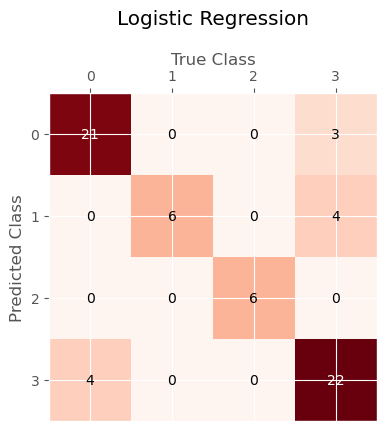

Classification Report:
Accuracy Score: 0.8333
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       1.00      0.60      0.75        10
           2       1.00      1.00      1.00         6
           3       0.76      0.85      0.80        26

    accuracy                           0.83        66
   macro avg       0.90      0.83      0.85        66
weighted avg       0.85      0.83      0.83        66



=============================== Decision Tree ===============================


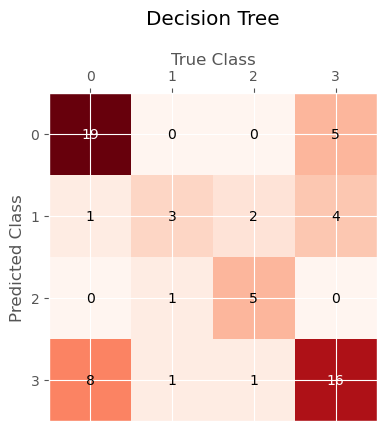

Classification Report:
Accuracy Score: 0.6515
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        24
           1       0.60      0.30      0.40        10
           2       0.62      0.83      0.71         6
           3       0.64      0.62      0.63        26

    accuracy                           0.65        66
   macro avg       0.64      0.64      0.62        66
weighted avg       0.65      0.65      0.64        66



=============================== SVM ===============================


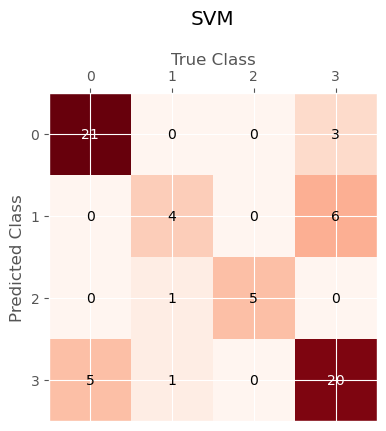

Classification Report:
Accuracy Score: 0.7576
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.67      0.40      0.50        10
           2       1.00      0.83      0.91         6
           3       0.69      0.77      0.73        26

    accuracy                           0.76        66
   macro avg       0.79      0.72      0.74        66
weighted avg       0.76      0.76      0.75        66



=============================== Random Forest ===============================


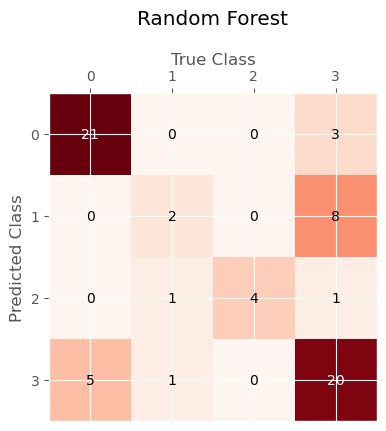

Classification Report:
Accuracy Score: 0.7121
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.50      0.20      0.29        10
           2       1.00      0.67      0.80         6
           3       0.62      0.77      0.69        26

    accuracy                           0.71        66
   macro avg       0.73      0.63      0.65        66
weighted avg       0.71      0.71      0.69        66



=============================== K-Nearest Neighbors ===============================


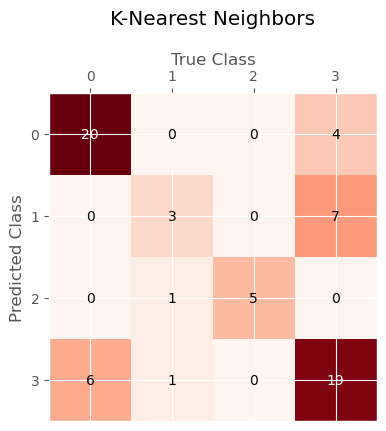

Classification Report:
Accuracy Score: 0.7121
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.60      0.30      0.40        10
           2       1.00      0.83      0.91         6
           3       0.63      0.73      0.68        26

    accuracy                           0.71        66
   macro avg       0.75      0.67      0.70        66
weighted avg       0.71      0.71      0.70        66



=============================== Naive Bayes ===============================


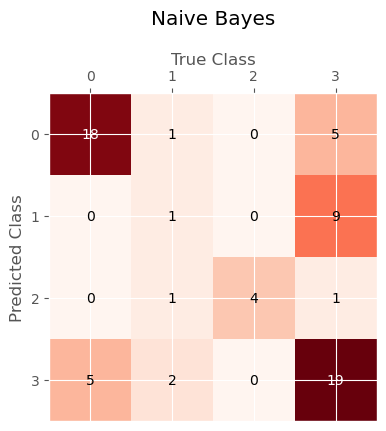

Classification Report:
Accuracy Score: 0.6364
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.20      0.10      0.13        10
           2       1.00      0.67      0.80         6
           3       0.56      0.73      0.63        26

    accuracy                           0.64        66
   macro avg       0.64      0.56      0.58        66
weighted avg       0.63      0.64      0.62        66



=============================== Gradient Boosting ===============================


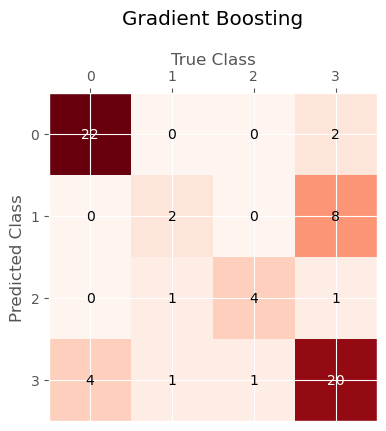

Classification Report:
Accuracy Score: 0.7273
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.50      0.20      0.29        10
           2       0.80      0.67      0.73         6
           3       0.65      0.77      0.70        26

    accuracy                           0.73        66
   macro avg       0.70      0.64      0.65        66
weighted avg       0.71      0.73      0.71        66



In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[numerical_features].dropna()
y = df['Hypertension']

# Chuẩn hóa dữ liệu trước khi thực hiện PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA=5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Tạo dictionary để lưu kết quả accuracy của từng model sau PCA
accuracy_dict_pca = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
    print(f"\n\n=============================== {model_name} ===============================")
    
    # train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict_pca[model_name].append(accuracy)
    
    # Tính confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plot_confusion_matrix(cm, class_labels, model_name)
    
    print("Classification Report:")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3]))

# 5. BMI, Systolic, Diastolic 3D

In [16]:
import plotly.graph_objs as go
import pandas as pd

# # Giả sử bạn đã có các dữ liệu này từ DataFrame df
# bmi = df['BMI(kg/m^2)']
# systolic_bp = df['Systolic BP(mmHg)']
# diastolic_bp = df['Diastolic BP(mmHg)']

# Tạo trace cho biểu đồ 3D
trace = go.Scatter3d(
    x=df['Heart Rate(b/m)'],
    y=df['Systolic BP(mmHg)'],
    z=df['Diastolic BP(mmHg)'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Hypertension'],  # Màu của các điểm dựa trên Hypertension
        colorscale='Viridis',       # Thang màu
        opacity=0.8,
        colorbar=dict(
            title="Hypertension",
            tickvals=[0, 1, 2, 3],
            ticktext=['Normal (0)', 'Stage 1 (1)', 'Stage 2 (2)', 'Prehypertension (3)']
        )
    )
)

# Cài đặt layout cho biểu đồ
layout = go.Layout(
    title='3D Plot of Heart Rate, Systolic BP, and Diastolic BP',
    scene=dict(
        xaxis=dict(title='Heart Rate(b/m)'),
        yaxis=dict(title='Systolic BP (mmHg)'),
        zaxis=dict(title='Diastolic BP (mmHg)'),
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Cài đặt margin
)

# Tạo figure và vẽ biểu đồ
fig = go.Figure(data=[trace], layout=layout)
fig.show()